In [80]:
import os
# If cwd is not the same as the script's directory, change to the script's directory
if os.getcwd() != os.path.dirname('/home/joe/HPC_Wint26/particleBox'):
    os.chdir('/home/joe/HPC_Wint26/particleBox')
    print("Set working directory to script's directory: " + os.getcwd())


import matplotlib.pyplot as plt
import numpy as np

Set working directory to script's directory: /home/joe/HPC_Wint26/particleBox


# Testing Our Simulation

# Collision Tests
We first want to confirm that collisions *look* how we would expect. We can do this by turning off the stochastic part of the simulation so that everything is deterministic, and then just throw particles at each other in different ways. 


## Test 1: Direct Collisions
Our first test is with simple 1D collisions. This simple test will verify that energy is transferred correctly between colliding particles. 

To start this test, we place two particles, A and B, some distance apart on the x-axis.

1. Moving-Stationary Collision

Particle A is stationary, Particle B moves toward it.

In an elastic collision, we should expect that B will transfer all of its energy to A. B should stop, A should move.

2. Moving-Moving Collision

Both Particle A and Particle B are moving toward each other. 

In this collision, we should expect that A and B bounce off each other and move away, each with a velocity equal to the other's initial velocity. 


In [81]:
# Direct Collision Tests

## Test 2: Glancing Collisions
Our second test adds another dimension to the collision. This time, the particles are slightly misaligned and collide at an angle. This should verify that everything ends up going in the right direction after a glancing collision. 

To start this test, we place Particles A and B some distance apart along the x-axis again, but also displace one of them by $1/2 \sigma$.

1. Moving-Stationary Collision

Particle A is stationary, Particle B moves toward it. 

We should expect to see Particle A travel along the path that B was originally moving.

2. Moving-Moving Collision

Particle A and Particle B move toward a common point at which they will collide. 

We should expect them to shoot off in directions that are at an angle from the original vector. 

In [82]:
# Glancing Collision Tests

## Energy Tests
Once the stochastic force is turned on, we can't expect collisions to behave exactly as expected in the ballistic regime. After confirming via the tests above that collisions work as expected, we can turn on LD and instead watch the energy of the simulation.

Because the system is given a finite energy $k_BT$, we would expect that the equilirium energy of our system follows
$$
\left< \frac{1}{2} mv^2 \right> = \frac{1}{2} d k_B T,
$$
where $\left< \frac{1}{2} mv^2 \right>$ is the mean kinetic energy of the particles, $d$ is the number of dimensions, and $k_BT$ is the thermal energy of the system. 

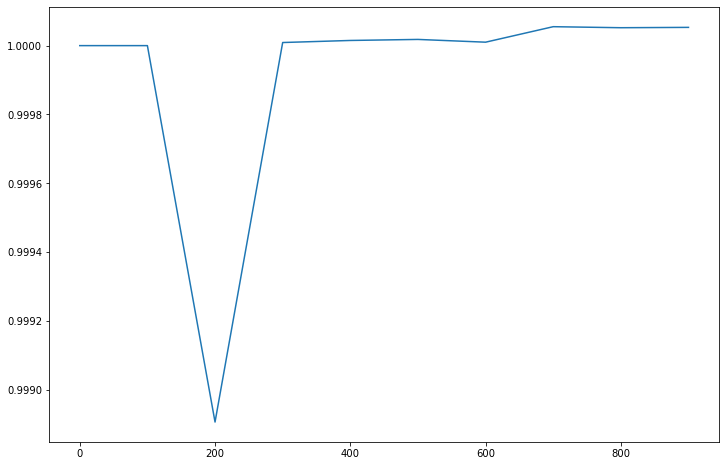

In [83]:
# Energy Conservation Tests
data = np.loadtxt('langevin2D_EnergyTest_energies.dat')

times = data[:, 0]
energy = data[:, 1]

fig = plt.figure(figsize=(12, 8))
plt.plot(times, energy)

## Time-Reversal Test
As a final sanity check for collisions, we can turn off the stochastic force once again and verify that running the sim in reverse from a given point in time returns to the initial conditions. 

1. Initialize sim and save positions
2. Run sim for $N$ steps
3. Flip all velocities
4. Run sim for $N$ steps again
5. Check that final positions are the same as initial ones. 

In [84]:
# Time-Reversal Tests